# Challenge

We are the team composed by:

- Carlos Aznar (capitán)
- Jason Carneiro
- Elías Carrilo
- Alejandro Rodríguez
- Adrián Blázquez

In this project we discuss how to make three models accurate and precise (one geometric, a decision tree and a GaussianNB). To do so:

# 1. The knowledge domain is analyzed
# 2. Exploratory analysis
# 3. Machine learning model
# 4. Result of the competition
# 5. Presentation discussion


# 1. The knowledge domain is analyzed

Analice el dataset proporcionado, entendiendo las variables del mismo, y su significado. Discuta en grupo sus intuiciones sobre qué variables pueden ser buenos predictores del riesgo asociado. Resuman sus conclusiones en el cuaderno (notebook) de Jupyter.

Para ello, a continuación, se lee el dataset, y se presenta en una tabla la descripción de las variables que se propone en Kaagle. Se plantea que las varaibles más relacionadas con el poder adquisitivo del futuro deudor serán aquellas apriori más relacionadas, como el número de empleados. En cambio, sobre variables como la fecha o el nombre, no se espera gran correlación, a no ser que en las fechas se aprecien un mal momento para el banco que le obligue a conceder pocos créditos. En cuanto al nombre, directamente dle nombre no parece que se pueda encontrar correlación, sin embargo, si se establece una realción entre el nombre y el sector de la empresa, entonces, sí, o al menos en la videa real, sí se podría.

Para ello se lee el dataset de train para cargar el data frame.

In [12]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

data = pd.read_csv('data/train.csv', sep=",", encoding = "ISO-8859-1")
df

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,d30838cf806,6340864010,QUALITY DOCUMENT SOLUTIONS INC,ODESSA,TX,WELLS FARGO BANK NATL ASSOC,SD,22-May-03,2003,10,...,2,10,1,1,0,N,30-Jun-03,"$150,000.00",$0.00,1
1,14560b856a6,1670916004,ATLANTIC INDUSTRIAL WOOD PRODU,KELLER,TX,WELLS FARGO BANK NATL ASSOC,CA,7-Apr-06,2006,1,...,0,1,1,1,Y,N,31-Jul-06,"$250,000.00",$0.00,1
2,051e5c3899f,7568313003,C J TREEHOUSE INC.,EL PASO,TX,BANK OF AMERICA NATL ASSOC,TX,12-Sep-94,1994,5,...,0,0,1,0,N,Y,31-Oct-94,"$53,000.00",$0.00,1
3,eb223b05ea8,4585814005,WINGSTOP,SAN ANTONIO,TX,COMPASS BANK,AL,18-Jun-01,2001,1,...,3,1,89769,1,0,N,31-Aug-01,"$170,000.00",$0.00,1
4,c80c89ac964,2003866003,H & H MACHINE & SUPPLY INC,ODESSA,TX,SOUTHWEST BANK,TX,12-May-06,2006,5,...,0,5,1,1,0,N,31-May-06,"$121,000.00",$0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49315,7bc068859e5,4999154008,SUPREME BAKERY INC,EL PASO,TX,JPMORGAN CHASE BANK NATL ASSOC,IL,23-Oct-01,2002,13,...,2,13,1,0,0,N,31-Mar-02,"$63,000.00",$0.00,1
49316,1f0420db159,1401875000,"Yunmi Sushi, Corp.",HOUSTON,TX,JPMORGAN CHASE BANK NATL ASSOC,IL,4-Aug-05,2005,1,...,1,1,0,1,Y,N,30-Sep-05,"$25,000.00",$0.00,1
49317,7f4cbcda5f5,5823093008,SOUTHSIDE ACE HARDWARE,GRAND PRAIRIE,TX,BANK OF THE WEST,TX,3-Aug-93,1993,8,...,0,0,1560,0,N,N,31-Jan-94,"$200,000.00",$0.00,1
49318,4dcd80b2311,2713645005,"THE FORSBERG LAW FIRM, P.C.",MONTGOMERY,TX,CAPITAL ONE NATL ASSOC,VA,21-Sep-07,2007,3,...,0,3,0,1,N,N,31-Oct-07,"$35,000.00",$0.00,1


In [13]:
# we can get the number of samples and features
df.shape

(49320, 21)

In [14]:
# Information about columns and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49320 entries, 0 to 49319
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 49320 non-null  object 
 1   LoanNr_ChkDgt      49320 non-null  int64  
 2   Name               49319 non-null  object 
 3   City               49320 non-null  object 
 4   State              49320 non-null  object 
 5   Bank               49120 non-null  object 
 6   BankState          49120 non-null  object 
 7   ApprovalDate       49320 non-null  object 
 8   ApprovalFY         49320 non-null  object 
 9   NoEmp              49320 non-null  int64  
 10  NewExist           49313 non-null  float64
 11  CreateJob          49320 non-null  int64  
 12  RetainedJob        49320 non-null  int64  
 13  FranchiseCode      49320 non-null  int64  
 14  UrbanRural         49320 non-null  int64  
 15  RevLineCr          49031 non-null  object 
 16  LowDoc             491

In [15]:
# Basic statistics of the dataset in all the numeric columns
df.describe()

,LoanNr_ChkDgt,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,Accept
count,4.932000e+04,49320.000000,49313.000000,49320.000000,49320.000000,49320.000000,49320.000000,49320.000000
mean,4.941161e+09,10.794505,1.317361,9.871006,11.930211,3933.928062,0.658942,0.810929
std,2.530125e+09,44.645641,0.467497,262.815556,266.334776,15141.332203,0.595339,0.391569
min,1.000254e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.731376e+09,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,4.598009e+09,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,7.141562e+09,10.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
max,9.995563e+09,4000.000000,2.000000,8800.000000,9500.000000,92000.000000,2.000000,1.000000


| Column |  Non-Null Count | Dtype | Description | 
| --- | --- | --- |--- |   
| 0   id |                49320 non-null | object | Identifier of the data instance |
| 1   LoanNr_ChkDgt  |    49320 non-null | int64  | Identifier of the loan petition|
| 2   Name      |         49319 non-null | object | Borrower name |
| 3   City       |        49320 non-null | object | Borrower city |
| 4   State       |       49320 non-null | object | Borrower state |
| 5   Bank         |      49120 non-null | object | Bank name |
| 6   BankState     |     49120 non-null | object | Bank state |
| 7   ApprovalDate  |     49320 non-null | object | Date SBA commitment issued |
| 8   ApprovalFY  |        49320 non-null | object | Fiscal year of commitment |
| 9   NoEmp        |      49320 non-null  | int64  | Number of business employees |
| 10  NewExist     |      49313 non-null | float64| Existing = 1/New = 2 Business |
| 11  CreateJob    |      49320 non-null | int64  | Number of jobs created |
| 12  RetainedJob   |     49320 non-null | int64  | Number of jobs retained |
| 13  FranchiseCode  |    49320 non-null | int64  | Franchise code |
| 14  UrbanRural     |    49320 non-null | int64  | Urban = 1/Rural = 2 |
| 15  RevLineCr      |    49031 non-null | object | Revolving line of credit |
| 16  LowDoc         |    49160 non-null | object | Low Documentation Loan |
| 17  ChgOffDate      |   9571 non-null  | object | The date when a loan is declared to be in default |
| 18  DisbursementDate  |  49194 non-null | object | Disbursement date |
| 19  DisbursementGross | 49320 non-null | object | Amount disbursed |
| 20  BalanceGross     |  49320 non-null | object | Gross amount outstanding |
|  21  Accept          |   49320 non-null | int64 | Accepted = 1/Not Accepted = 0 |

# 2. Exploratory analysis

Analice el dataset para confirmar (o desestimar) sus hipótesis y discuta sus descubrimientos en el cuaderno.

Con este fin primero se realiza un análisis inicial, se encuntra la correlación y que muchas varaibles están correladas como objects, y a contianución se codifican estás como intergers para poder hallar correlaciones.

## a. Type of values
## b. Ratio of accept records
## c. Distribution of variables

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = data.copy()

In [22]:
df.head()

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,d30838cf806,6340864010,QUALITY DOCUMENT SOLUTIONS INC,ODESSA,TX,WELLS FARGO BANK NATL ASSOC,SD,22-May-03,2003,10,...,10,1,1,0,N,NaN,30-Jun-03,"$150,000.00",$0.00,1
1,14560b856a6,1670916004,ATLANTIC INDUSTRIAL WOOD PRODU,KELLER,TX,WELLS FARGO BANK NATL ASSOC,CA,7-Apr-06,2006,1,...,1,1,1,Y,N,NaN,31-Jul-06,"$250,000.00",$0.00,1
2,051e5c3899f,7568313003,C J TREEHOUSE INC.,EL PASO,TX,BANK OF AMERICA NATL ASSOC,TX,12-Sep-94,1994,5,...,0,1,0,N,Y,NaN,31-Oct-94,"$53,000.00",$0.00,1
3,eb223b05ea8,4585814005,WINGSTOP,SAN ANTONIO,TX,COMPASS BANK,AL,18-Jun-01,2001,1,...,1,89769,1,0,N,NaN,31-Aug-01,"$170,000.00",$0.00,1
4,c80c89ac964,2003866003,H & H MACHINE & SUPPLY INC,ODESSA,TX,SOUTHWEST BANK,TX,12-May-06,2006,5,...,5,1,1,0,N,NaN,31-May-06,"$121,000.00",$0.00,1


### a. Nan Values

<AxesSubplot:ylabel='None'>

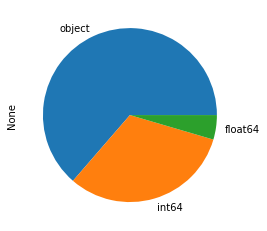

In [23]:
df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

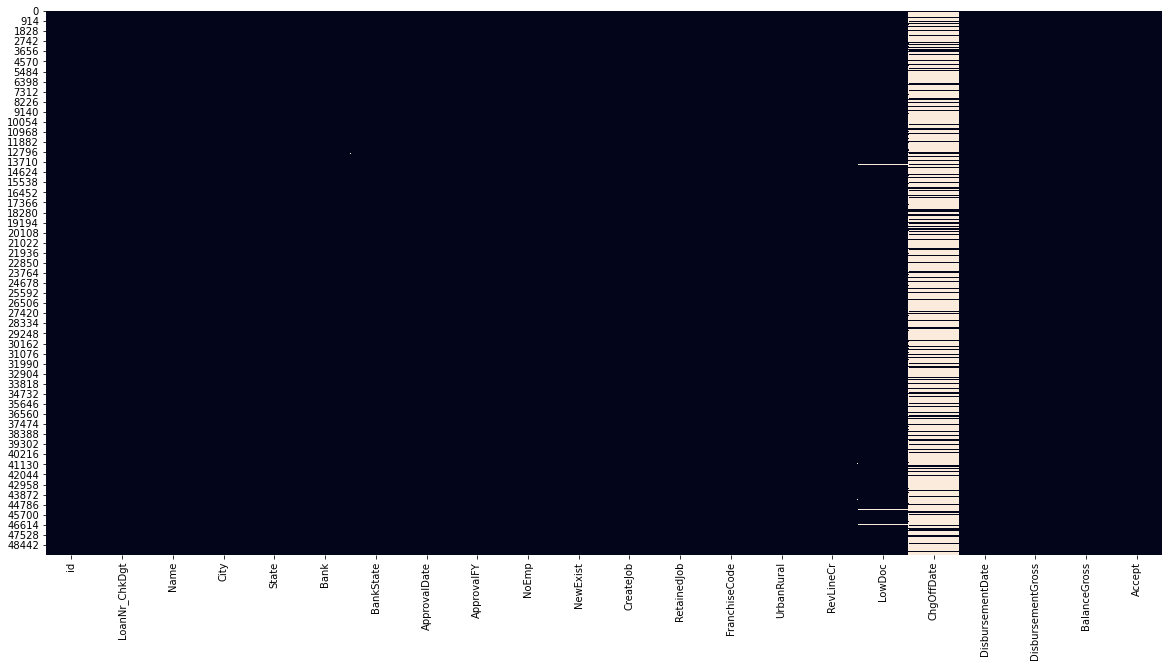

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

Se comprueba que mcuhas filas no son números

In [25]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

id                   0.000000
DisbursementGross    0.000000
UrbanRural           0.000000
FranchiseCode        0.000000
RetainedJob          0.000000
CreateJob            0.000000
BalanceGross         0.000000
NoEmp                0.000000
Accept               0.000000
ApprovalDate         0.000000
State                0.000000
City                 0.000000
LoanNr_ChkDgt        0.000000
ApprovalFY           0.000000
Name                 0.000020
NewExist             0.000142
DisbursementDate     0.002555
LowDoc               0.003244
BankState            0.004055
Bank                 0.004055
RevLineCr            0.005860
ChgOffDate           0.805941
dtype: float64

As the ChgOffDate is a variable with many nans, it is delted from the dataset

In [27]:
df.drop(['ChgOffDate'], axis=1, inplace=True)

<AxesSubplot:>

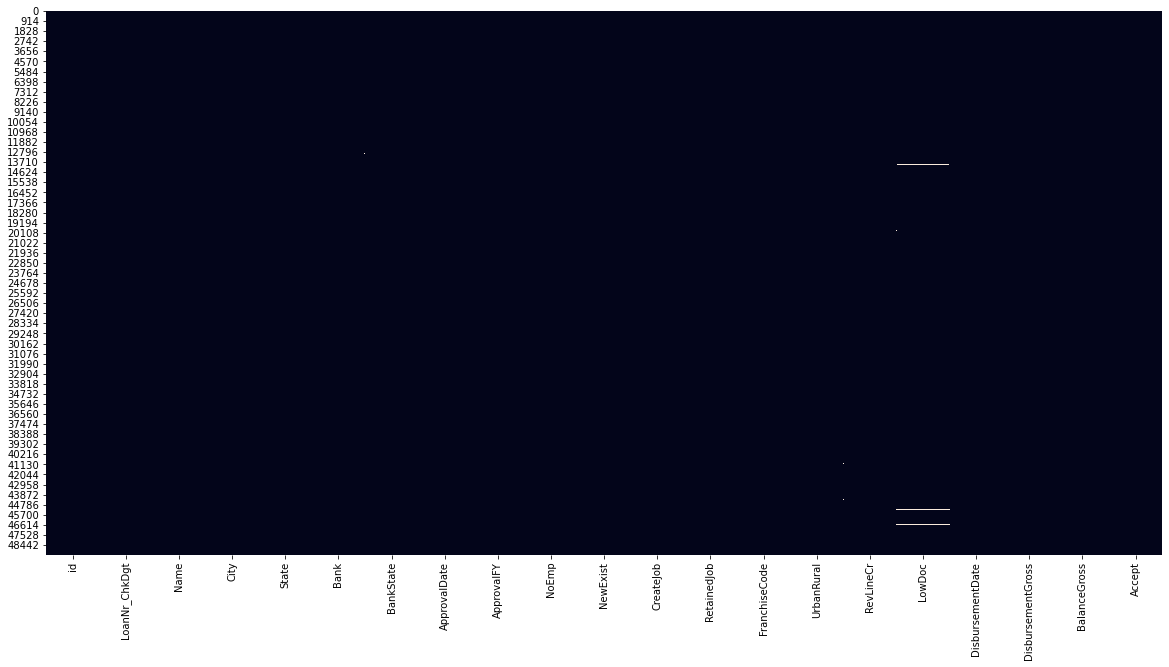

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

### b. Ratio of accept records

In [29]:
df['Accept'].value_counts(normalize=True)

1    0.810929
0    0.189071
Name: Accept, dtype: float64

## c. Distribution of variables

C:\Users\ablaz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


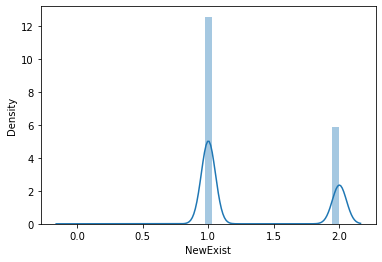

In [30]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

C:\Users\ablaz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ablaz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ablaz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

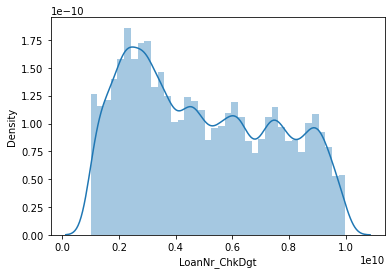

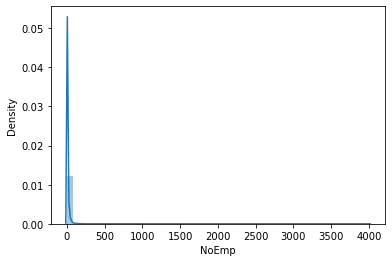

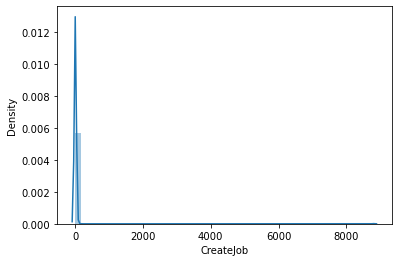

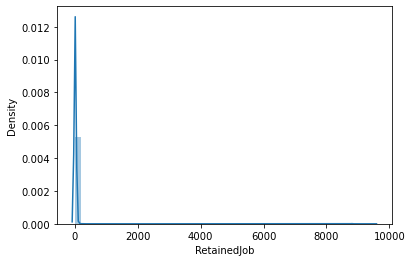

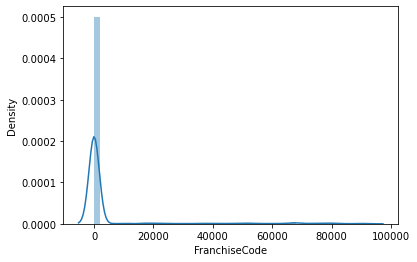

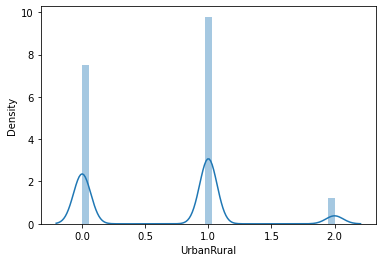

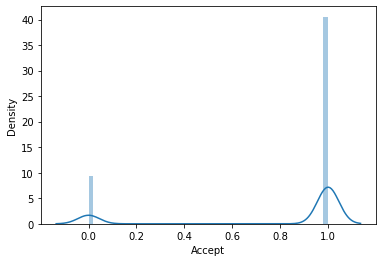

In [31]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

In [35]:
df_categorical = df.select_dtypes('object')
categorical_columns = df_categorical.columns
df_categorical.columns


Index(['id', 'Name', 'City', 'State', 'Bank', 'BankState', 'ApprovalDate',
       'ApprovalFY', 'RevLineCr', 'LowDoc', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross'],
      dtype='object')

In [36]:
sns.countplot(x='City',data=df,hue='Accept',ax=axes[row,col])

NameError: name 'axes' is not defined

In [37]:
df.columns

Index(['id', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Bank', 'BankState',
       'ApprovalDate', 'ApprovalFY', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'Accept'],
      dtype='object')

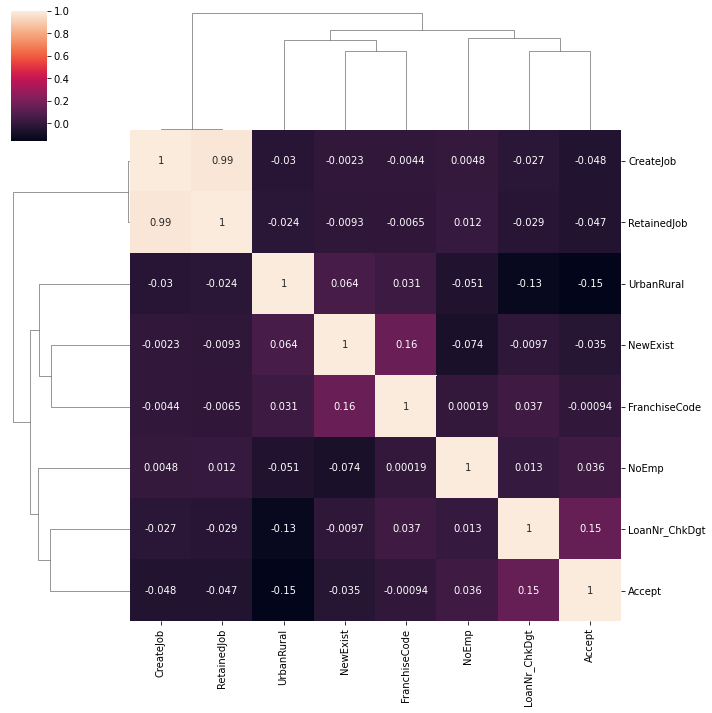

In [38]:
data.corr()
corrMatrix = data.corr()
sns.clustermap(corrMatrix, annot=True)
plt.show()

In [ ]:
sns.pairplot(df,hue='Accept')

In [39]:
pd.crosstab(df['Bank'], df['Accept'])

Accept,0,1
Bank,,
"1ST BANK, NATIONAL ASSOCIATION",1,0
1ST CHOICE BANK,0,3
1ST COMMERCIAL CAPITAL,4,2
1ST COMMUNITY FCU,0,3
1ST LIB NATL BK,0,1
...,...,...
YELLOWSTONE BANK,1,0
YOAKUM NATIONAL BANK,0,3
ZAPATA NATIONAL BANK,3,1


# 3. Machine learning model

Desarrolle uno o más modelos de aprendizaje automático para clasificar si una PYME debe (o no) recibir un crédito. Debe probar al menos: un algoritmo geométrico, un árbol de decisión y el algoritmo secreto recibido por el grupo. Discuta los resultados y valídelos.

## 3.1. Geometric model

## 3.2. Decision tree

## 3.3. GaussianNB

# 4. Result of the competition

Una vez disponga de un modelo, deberá usar la plataforma Kaggle para probar su modelo con datos, que combinan datos nuevos con los datos existentes. Puede realizar tantos intentos como desee. Razone los resultados en el cuaderno.

# 5. Presentation discussion